In [1]:
from folktables import ACSDataSource, ACSEmployment

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["AL"], download=True)

<AxesSubplot: >

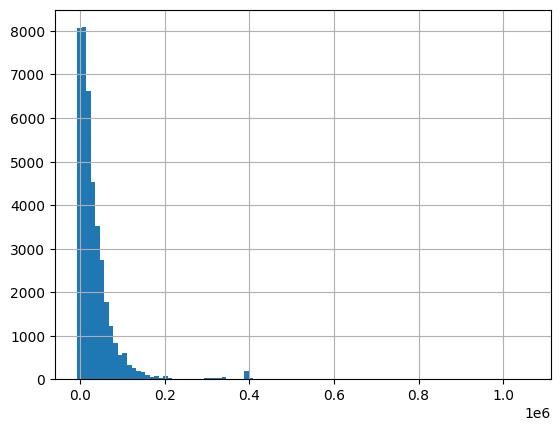

In [30]:
acs_data["PINCP"].hist(bins=100)

In [3]:
from folktables import ACSEmployment

features, label, group = ACSEmployment.df_to_numpy(acs_data)

XXX

In [31]:
from folktables import ACSDataSource, ACSEmployment
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["AL"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)

from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Embedding,
    Input,
    concatenate,
)
from keras import Model

In [32]:
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

In [33]:
# Simple Keras model to predict employment status

input_layer = Input(shape=(X_train.shape[1],))
dense1 = Dense(32, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(16, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
output = Dense(1, activation='sigmoid')(dropout2)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1195/1195 [==============================] - 3s 2ms/step - loss: 0.9293 - accuracy: 0.6327 - val_loss: 0.5319 - val_accuracy: 0.7530
Epoch 2/10
1195/1195 [==============================] - 2s 2ms/step - loss: 0.5157 - accuracy: 0.7252 - val_loss: 0.4643 - val_accuracy: 0.7779
Epoch 3/10
1195/1195 [==============================] - 2s 1ms/step - loss: 0.4935 - accuracy: 0.7560 - val_loss: 0.4531 - val_accuracy: 0.7907
Epoch 4/10
1195/1195 [==============================] - 2s 2ms/step - loss: 0.4808 - accuracy: 0.7661 - val_loss: 0.4447 - val_accuracy: 0.7934
Epoch 5/10
1195/1195 [==============================] - 2s 2ms/step - loss: 0.4730 - accuracy: 0.7748 - val_loss: 0.4335 - val_accuracy: 0.7956
Epoch 6/10
1195/1195 [==============================] - 2s 2ms/step - loss: 0.4690 - accuracy: 0.7777 - val_loss: 0.4306 - val_accuracy: 0.8000
Epoch 7/10
1195/1195 [==============================] - 2s 2ms/step - loss: 0.4620 - accuracy: 0.7790 - val_loss: 0.4337 - val_accuracy:

In [38]:
def f(X):
    return model.predict(X).flatten()

In [36]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


1/1 [==============================] - 0s 23ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

320/320 [==============================] - 0s 1ms/step


 10%|█         | 1/10 [00:00<00:06,  1.46it/s]

648/648 [==============================] - 1s 1ms/step


 20%|██        | 2/10 [00:02<00:09,  1.15s/it]

320/320 [==============================] - 1s 2ms/step


 30%|███       | 3/10 [00:02<00:06,  1.03it/s]

320/320 [==============================] - 0s 1ms/step


 40%|████      | 4/10 [00:03<00:05,  1.17it/s]

320/320 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [00:04<00:03,  1.31it/s]

320/320 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [00:04<00:02,  1.36it/s]

640/640 [==============================] - 1s 1ms/step


 70%|███████   | 7/10 [00:06<00:02,  1.13it/s]

320/320 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [00:06<00:01,  1.24it/s]

320/320 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [00:07<00:00,  1.33it/s]

320/320 [==============================] - 1s 2ms/step


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


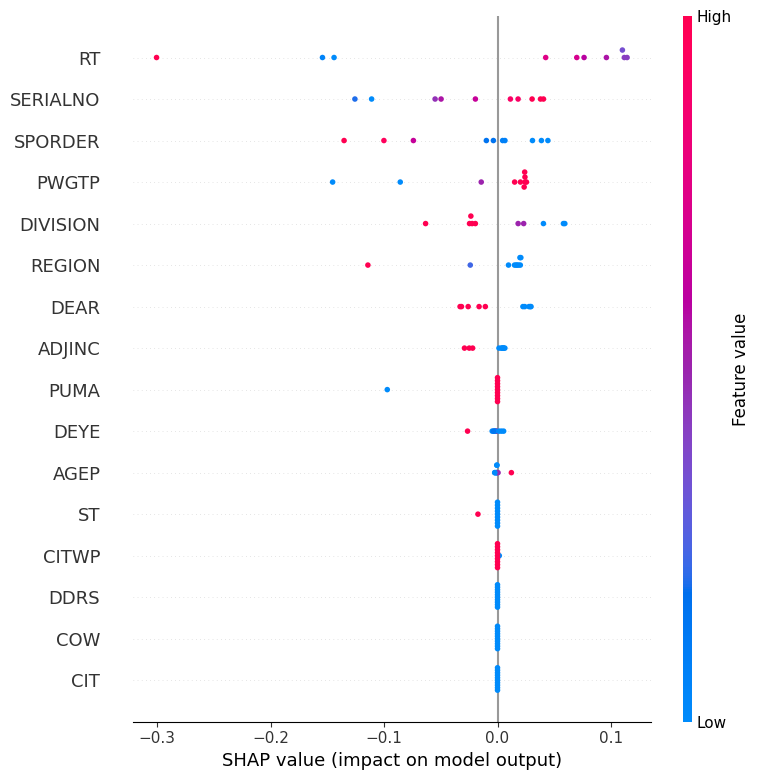

In [42]:
shap.initjs()
explainer = shap.KernelExplainer(f, X_train[:10, :])
shap_values = explainer.shap_values(X_test[:10, :])

# Ensure X_test has the same number of rows as shap_values
assert X_test[:10, :].shape[0] == shap_values.shape[0], "Number of rows in X_test and shap_values must match."

shap.summary_plot(shap_values, X_test[:10, :], feature_names=acs_data.columns)


In [47]:
explainer.expected_value

0.5166307806683221

In [1]:
from transformers import pipeline
import shap
classifier = pipeline("sentiment-analysis", return_all_scores=True)

data = ["I love you", "I hate you", "The sky is blue", "I like the product", "I do not like the product", "1+1=2"]

classifier = pipeline("sentiment-analysis", return_all_scores=True)
classifier(data)

c:\Users\Hauke\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision a

[[{'label': 'NEGATIVE', 'score': 0.00013436275185085833},
  {'label': 'POSITIVE', 'score': 0.9998656511306763}],
 [{'label': 'NEGATIVE', 'score': 0.9991129040718079},
  {'label': 'POSITIVE', 'score': 0.0008870697347447276}],
 [{'label': 'NEGATIVE', 'score': 0.0011761868372559547},
  {'label': 'POSITIVE', 'score': 0.9988238215446472}],
 [{'label': 'NEGATIVE', 'score': 0.00020555531955324113},
  {'label': 'POSITIVE', 'score': 0.9997944235801697}],
 [{'label': 'NEGATIVE', 'score': 0.9990246295928955},
  {'label': 'POSITIVE', 'score': 0.0009753643535077572}],
 [{'label': 'NEGATIVE', 'score': 0.053324926644563675},
  {'label': 'POSITIVE', 'score': 0.9466750621795654}]]

In [2]:
explainer = shap.Explainer(classifier)
shap_values = explainer(data)
shap.plots.text(shap_values[:1, :, "POSITIVE"])

In [4]:
shap_values_complex = explainer("i went and saw this movie last night after being coaxed to by a few friends of mine . i ' ll admit that i was reluctant to see it because from what i knew of ashton kutcher he was only able to do comedy . i was wrong . kutcher played the character of jake fischer very well , and kevin costner played ben randall with such professionalism . the sign of a good movie is that it can toy with our emotions . this one did exactly that . the entire theater ( which was sold out ) was overcome by laughter")
shap.plots.text(shap_values_complex[:1, :, "POSITIVE"])

PartitionExplainer explainer: 500it [01:22,  5.08it/s]                         


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (499,) + inhomogeneous part.

In [1]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiofiles                     22.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
aiosqlite                    0.18.0
albumentations               1.3.0
anyio                        3.6.2
appdirs                      1.4.4
argilla                      1.11.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.2
attrs                        22.2.0
Babel                        2.12.1
backcall                     0.2.0
backoff                      2.2.1
beautifulsoup4               4.12.2
binaryornot                  0.4.4
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import datasets
import numpy as np
import transformers

import shap

c:\Users\Hauke\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

In [11]:
classifier = transformers.pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis", return_all_scores=True)
classifier(short_data[:10])

config.json: 100%|██████████| 949/949 [00:00<00:00, 618kB/s]
`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hauke\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
pytorch_model.bin: 100%|██████████| 540M/540M [02:03<00:00, 4.37MB/s] 
tokenizer_config.json: 100%|██████████| 338/338 [00:00<?, ?B/s] 
vocab.txt: 100

IndexError: index out of range in self

In [9]:
explainer = shap.Explainer(classifier)
shap_values = explainer(short_data[2:3])
shap.plots.text(shap_values[:2, :, "POSITIVE"])

PartitionExplainer explainer: 2it [00:36, 36.92s/it]               


In [24]:
classifier2 = transformers.pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis", return_all_scores=True)
classifier2(["I need to go to the store to buy some milk. Additionally, I need to go to the bank to deposit my paycheck. I also need to go to the post office to mail a letter. Finally, I need to go to the library to return a book.", "Test123"])
explainer2 = shap.Explainer(classifier2)
shap_values2 = explainer2(["I need to go to the store to buy some milk. Additionally, I need to go to the bank to deposit my paycheck. I also need to go to the post office to mail a letter. Finally, I need to go to the library to return a book.", "Test123"])

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
PartitionExplainer explainer: 3it [00:45, 22.83s/it]               


In [42]:
shap.plots.text(shap_values2[0:1, :, "NEU"])
shap.plots.text(shap_values2[1:2, :, "NEU"])